In [1]:
import os
import sys
import json
import itertools
from scipy import signal
import numpy
import matplotlib.pyplot as pyplot
import boxkit
from boxkit.library import Server as BoxServer

In [2]:
projectHome = "/home/akash/Desktop/Akash/Workbench/Flash-X-Simulations/simulation/EvaporatingBubble/OutflowTest/outflow/buffer_0.25/jobnode.archive"
file = "INS_Evaporating_Bubble_hdf5_plt_cnt_0003"
gridList = ["ref_0.094", "ref_0.031", "ref_0.010"]

In [3]:
sedona = BoxServer(hostname="c361652l.cels.anl.gov", username="akash")
sedona.connect()

gridData = [boxkit.read_dataset(projectHome + os.sep + grid + os.sep + file, source="flash", server=sedona) for grid in gridList]
gridData = [boxkit.mergeblocks(dataset, ["velx", "vely", "pres", "temp"]) for dataset in gridData]

sedona.close()

[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files
[boxkit.resource.read]: Avoid multiprocessing for remote files


In [4]:
gridData[0].blocklist[0].xrange("center")

array([0.046875, 0.140625, 0.234375, 0.328125, 0.421875, 0.515625,
       0.609375, 0.703125])

In [5]:
gridData[1].blocklist[0].xrange("center")[1:-1:3]

array([0.046875, 0.140625, 0.234375, 0.328125, 0.421875, 0.515625,
       0.609375, 0.703125])

In [6]:
gridData[2].blocklist[0].xrange("center")[4:-4:9]

array([0.046875, 0.140625, 0.234375, 0.328125, 0.421875, 0.515625,
       0.609375, 0.703125])

In [7]:
for dataset in gridData:
    scale = {}
    scale["pres"] = [numpy.min(dataset["pres"]), numpy.max(dataset["pres"])]
    scale["temp"] = [numpy.min(dataset["temp"]), numpy.max(dataset["temp"])]
    scale["velc"] = [min(numpy.min(dataset["velx"]), numpy.min(dataset["vely"])), max(numpy.max(dataset["velx"]), numpy.max(dataset["vely"]))]
    for block in dataset.blocklist:
        block["pres"] = (block["pres"]-scale["pres"][0])/(scale["pres"][1]-scale["pres"][0])
        block["temp"] = (block["temp"]-scale["temp"][0])/(scale["temp"][1]-scale["temp"][0])
        block["velx"] = (block["velx"]-scale["velc"][0])/(scale["velc"][1]-scale["velc"][0])
        block["vely"] = (block["vely"]-scale["velc"][0])/(scale["velc"][1]-scale["velc"][0])

1.4054681273423337


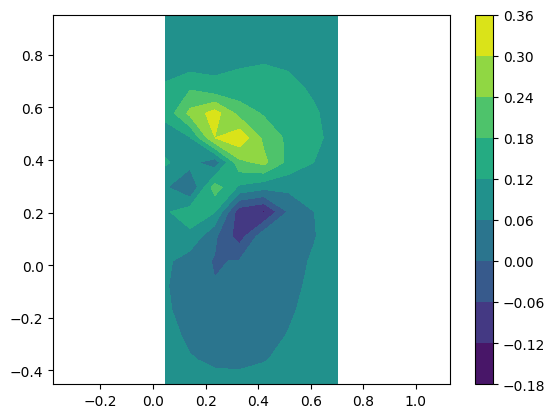

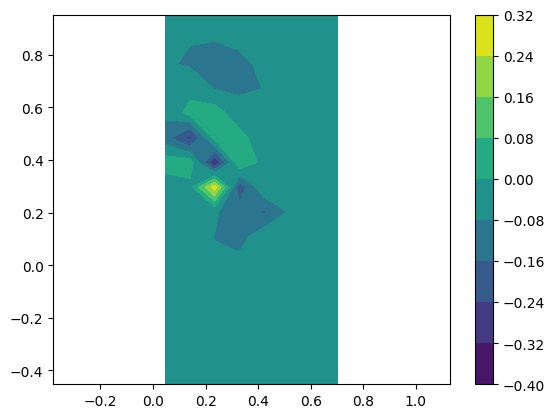

In [42]:
var = "velx"

pyplot.figure()
for block in gridData[0].blocklist:
    xmesh,ymesh = numpy.meshgrid(block.xrange("center"),block.yrange("center"))
    pyplot.contourf(xmesh,ymesh,block[var][0]-gridData[2][var][0][0][4:-4:9,4:-4:9])
pyplot.colorbar()
pyplot.axis('equal')

pyplot.figure()
for block in gridData[1].blocklist:
    xmesh,ymesh = numpy.meshgrid(block.xrange("center"),block.yrange("center"))
    pyplot.contourf(xmesh[1:-1:3,1:-1:3],ymesh[1:-1:3,1:-1:3],block[var][0][1:-1:3,1:-1:3]-gridData[2][var][0][0][4:-4:9,4:-4:9])
pyplot.colorbar()
pyplot.axis('equal')

err0 = gridData[2][var][0][0][4:-4:9,4:-4:9] - gridData[0][var][0][0][:,:]
err1 = gridData[2][var][0][0][4:-4:9,4:-4:9] - gridData[1][var][0][0][1:-1:3,1:-1:3]

print(numpy.linalg.norm(err0,'fro')/numpy.linalg.norm(err1,'fro'))